**It combines multiple models (called base estimators) to make a more accurate and robust prediction.**

** **

**"Ensemble" means a group  Voting Classifier**

Hard Voting : best majority

Soft Voting : 

| Model | P(Class 0) | P(Class 1) |
| ----- | ---------- | ---------- |
| A     | 0.3        | 0.7        |
| B     | 0.4        | 0.6        |
| C     | 0.2        | 0.8        |


P(0) = (0.3 + 0.4 + 0.2) / 3 = 0.3

P(1) = (0.7 + 0.6 + 0.8) / 3 = 0.7

choose 1

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv(r"D:\GeakMinds Internship\real world projects\datasets\titanic\gender_submission.csv")
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [2]:
df_test=pd.read_csv(r'd:\GeakMinds Internship\real world projects\datasets\titanic\test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df_train=pd.read_csv(r'd:\GeakMinds Internship\real world projects\datasets\titanic\train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df_test=df_test.merge(df,on='PassengerId')

In [7]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [8]:
df_train.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
df_test.isnull().mean()*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
Survived        0.000000
dtype: float64

In [10]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mode()[0])

In [11]:
df_train.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

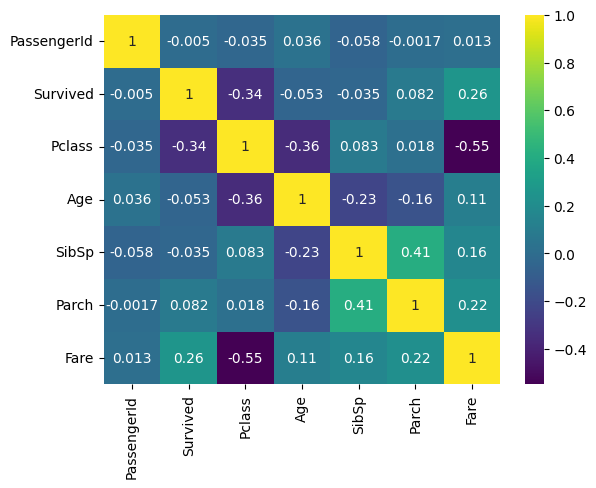

In [12]:
cor=df_train.select_dtypes(include='number').corr()
sns.heatmap(cor,annot=True,cmap='viridis')

In [13]:
df_train.drop(columns='Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [14]:
df_train['tot_family']=df_train['SibSp']+df_train['Parch']+1
df_train['IsAlone'] = (df_train['tot_family'] == 1).astype(int)

<Axes: >

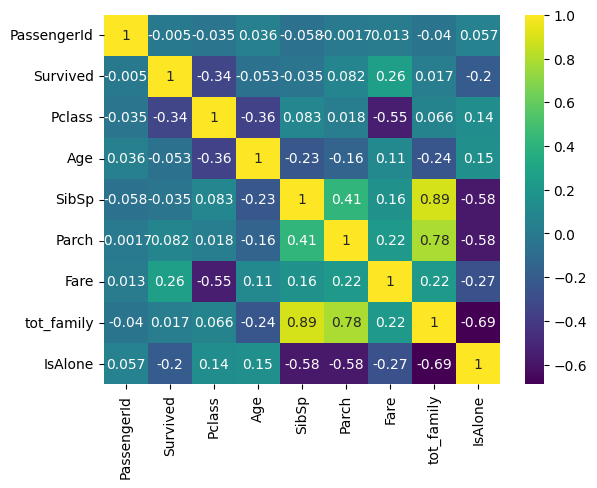

In [15]:
cor=df_train.select_dtypes(include='number').corr()
sns.heatmap(cor,annot=True,cmap='viridis')

In [16]:
import pandas as pd
df_train['AgeBin'] = pd.cut(df_train['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

df_train['FareBin'] = pd.qcut(df_train['Fare'], q=4, labels=['Low', 'Mid', 'High', 'VeryHigh'])

In [17]:
df_train = pd.get_dummies(df_train, columns=['Sex'], drop_first=True)
df_train = pd.get_dummies(df_train, columns=['Embarked','AgeBin','FareBin'])

In [18]:
df_train=df_train.drop(columns='Name')

In [19]:
df_train=df_train.drop(columns=['Cabin'])

In [20]:
df_train=df_train.drop(columns=['Ticket'])

In [21]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mode()[0])
df_test.drop(columns='Cabin')
df_test['tot_family']=df_test['SibSp']+df_test['Parch']+1
df_test['IsAlone'] = (df_test['tot_family'] == 1).astype(int)
df_test['AgeBin'] = pd.cut(df_test['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])
df_test['FareBin'] = pd.qcut(df_test['Fare'], q=4, labels=['Low', 'Mid', 'High', 'VeryHigh'])
df_test = pd.get_dummies(df_test, columns=['Sex'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Embarked','AgeBin','FareBin'])
df_test=df_test.drop(columns=['Name','Ticket','Cabin'])

In [22]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [23]:
clf1 = LogisticRegression(max_iter=1000)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = KNeighborsClassifier(n_neighbors=5)

# Hard Voting

In [29]:
df_test['Fare']=df_test['Fare'].fillna(0)

In [30]:
hard_voting = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('knn', clf3)],
    voting='hard'
)

hard_voting.fit(df_train.drop(columns='Survived'), df_train['Survived'])
y_pred_hard = hard_voting.predict(df_test.drop(columns='Survived'))


print("Hard Voting Accuracy:", accuracy_score(df_test['Survived'], y_pred_hard))


C:\Users\mutte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hard Voting Accuracy: 0.8492822966507177


In [32]:
soft_voting = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('knn', clf3)],
    voting='soft'
)

soft_voting.fit(df_train.drop(columns='Survived'), df_train['Survived'])
y_pred_soft = soft_voting.predict(df_test.drop(columns='Survived'))

print("Soft Voting Accuracy:", accuracy_score(df_test['Survived'], y_pred_hard))


Soft Voting Accuracy: 0.8492822966507177


C:\Users\mutte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
